# STUDENT ALCOHOL CONSUMPTION
### DATASET ANALYSIS

___

#### CONTEXT:
(*from source*)
> The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

#### DATASET:
[Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-merge.R)

### FEATURE REFERENCE TABLE
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex** - student's sex (binary: 'F' - female or 'M' - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

1. **G1** - first period grade (numeric: from 0 to 20)
2. **G2** - second period grade (numeric: from 0 to 20)
3. **G3** - final grade (numeric: from 0 to 20, output target)

*Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.*


In [594]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from importlib import reload
import math
import time

# local files


# PART 1
___

In [595]:
raw_student_data_math = pd.read_csv('datasets\\student-mat.csv')
raw_student_data_por = pd.read_csv('datasets\\student-por.csv')

df_math = pd.DataFrame(raw_student_data_math)
df_por = pd.DataFrame(raw_student_data_por)

In [596]:
# check for any missing values
df_math.isnull().values.any()

False

In [597]:
len(df_math), len(df_por)
#

(395, 649)

In [598]:
# preview math data
df_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [599]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# PART 1a
### BASIC STUDENT DEMOGRAPHIC DATA
___

<Figure size 360x360 with 0 Axes>

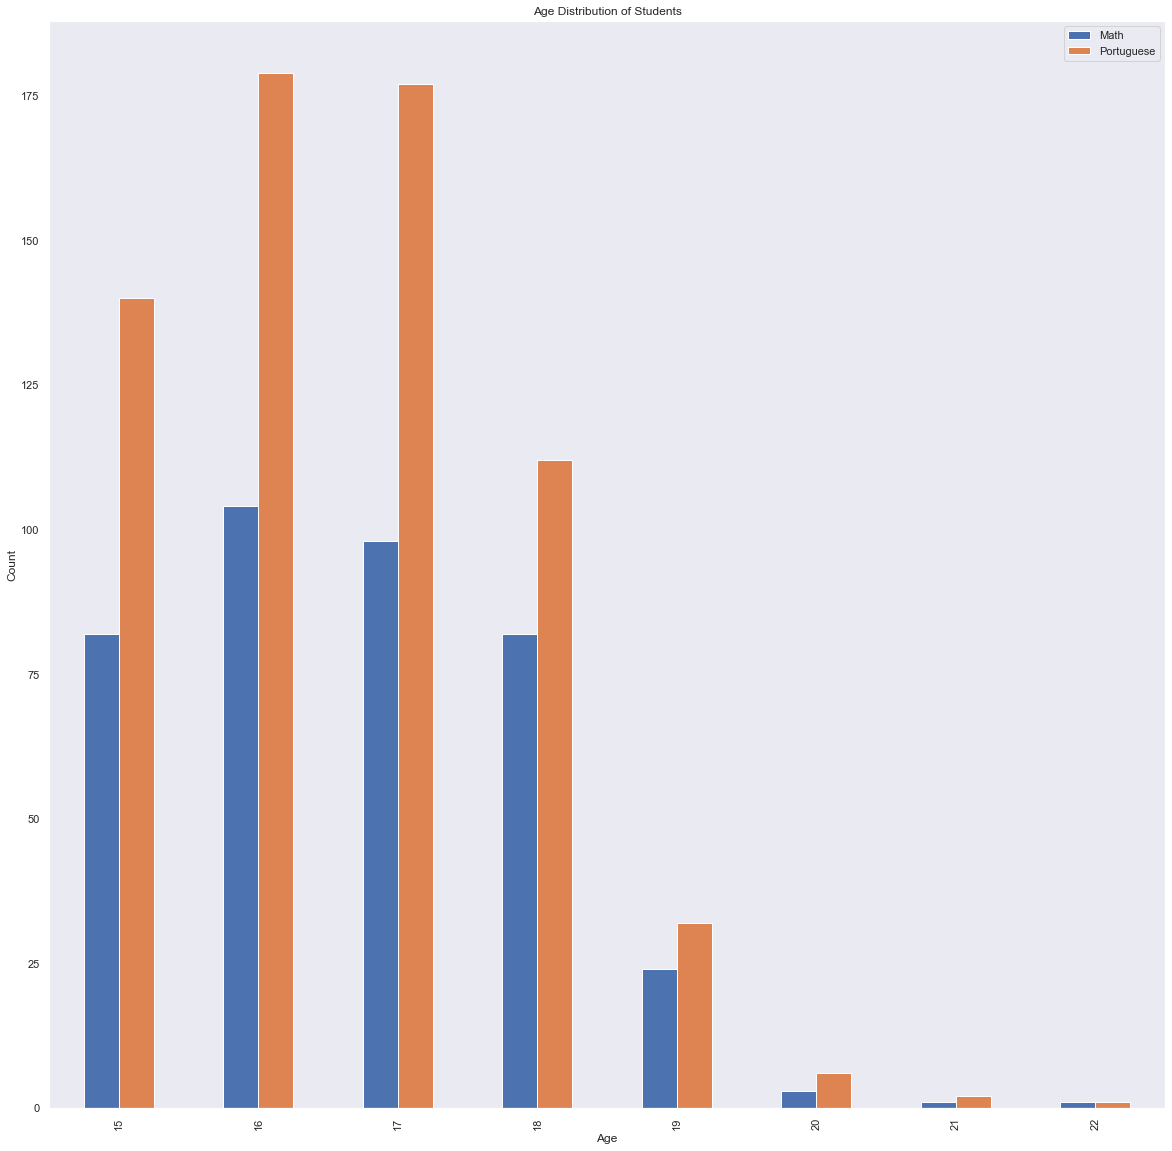

<Figure size 360x360 with 0 Axes>

In [600]:
# get age dist among all students
agg_age_data = pd.DataFrame(data=df_math['age'].value_counts().sort_values(ascending=False))
agg_age_data = agg_age_data.rename(columns={'age': 'Math'})
agg_age_data['Portuguese'] = df_por['age'].value_counts().values
agg_age_data.sort_index(axis=0).plot(kind='bar', grid=False, title='Age Distribution of Students', xlabel='Age').set(ylabel='Count')
plt.figure(figsize=(5, 5))

array([<AxesSubplot:ylabel='Math'>, <AxesSubplot:ylabel='Portuguese'>],
      dtype=object)

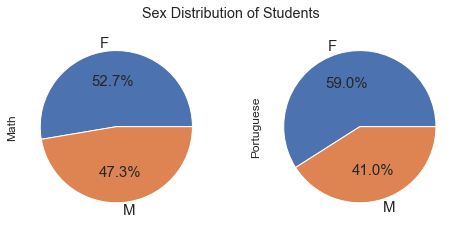

In [601]:
# get dist of sex among all students

agg_sex_data = pd.DataFrame(data=df_math['sex'].value_counts())
agg_sex_data = agg_sex_data.rename(columns={'sex': 'Math'})
agg_sex_data['Portuguese'] = df_por['sex'].value_counts().values
agg_sex_data.sort_index(axis=0).plot(kind='pie', title='Sex Distribution of Students', subplots=True, legend=False, figsize=(8,3.5), autopct='%1.1f%%', startangle=0, fontsize=15,)

___
#### *Which sex consumes more alcohol on average?*

In [602]:
# split df by sexes
female_data = df_por.loc[df_por['sex'] == 'F']
male_data = df_por.loc[df_por['sex'] == 'M']

# isolate alcohol consumption data for each
# Talc (Total alcohol consumption) = Dalc + Walc
female_alc_cons = female_data[['Dalc', 'Walc']]
female_alc_cons['Talc'] = female_data['Walc'] + female_data['Dalc']
male_alc_cons = male_data[['Dalc', 'Walc']]
male_alc_cons['Talc'] = male_data['Walc'] + male_data['Dalc']

# sum all student Talc values for each sex & divide by number of students of each sex
avg_female_alc_cons = female_alc_cons['Talc'].sum() / len(female_alc_cons)
avg_male_alc_cons = male_alc_cons['Talc'].sum() / len(male_alc_cons)

# display results
print(f"Total Male Alcohol Consumption: {round(avg_male_alc_cons, 2)}")
print(f"Total Female Alcohol Consumption: {round(avg_female_alc_cons, 2)}")
avg_male_alc_cons > avg_female_alc_cons

Total Male Alcohol Consumption: 4.59
Total Female Alcohol Consumption: 3.22


<ipython-input-602-869c8cbd8e8c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_alc_cons['Talc'] = female_data['Walc'] + female_data['Dalc']
<ipython-input-602-869c8cbd8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_alc_cons['Talc'] = male_data['Walc'] + male_data['Dalc']


True

On average, Male students consume more alcohol than female students (*in this dataset*)

___
#### *Which sex receives higher grades on average?*

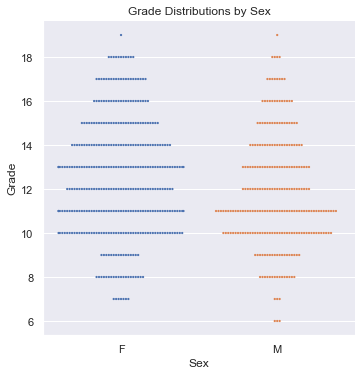

In [603]:
sex_grades = raw_student_data_por[['sex', 'G3']]
# ignore outliers
sex_grades = sex_grades.loc[sex_grades['G3'] > 5]
sns.catplot(data=sex_grades, x='sex', y='G3', kind='swarm', hue='sex', s=2.25).set(title='Grade Distributions by Sex', ylabel='Grade', xlabel='Sex')

<AxesSubplot:title={'center':'Grade Frequency by Sex'}, xlabel='Grade', ylabel='Count'>

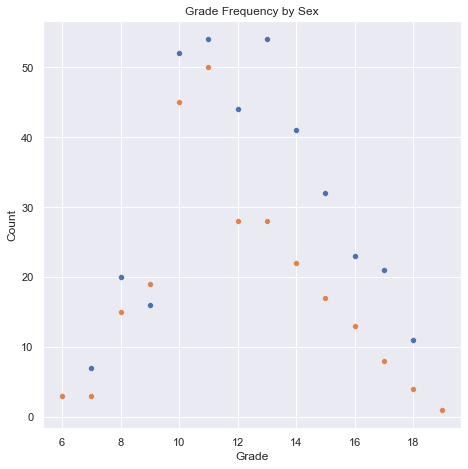

In [604]:
plt.figure(figsize=(7.5, 7.5))
sex_grades_ = raw_student_data_por[['sex', 'G3']]
sex_grades_m = sex_grades.loc[sex_grades_['sex'] == 'M'].value_counts()
sex_grades_f = sex_grades.loc[sex_grades_['sex'] == 'F'].value_counts()
sns.scatterplot(data=sex_grades_f, x='G3', y=sex_grades_f.values, legend='full').set(title='Grade Frequency by Sex', xlabel='Grade', ylabel='Count',)
sns.scatterplot(data=sex_grades_m, x='G3', y=sex_grades_m.values)

___
#### *Is there a relationship between alcohol consumption and final grades?*

[Text(0.5, 1.0, 'Student Alcohol Consumption Distribution'),
 Text(0.5, 0, 'Weekly Alcohol Consumption'),
 Text(0, 0.5, 'Number of Students')]

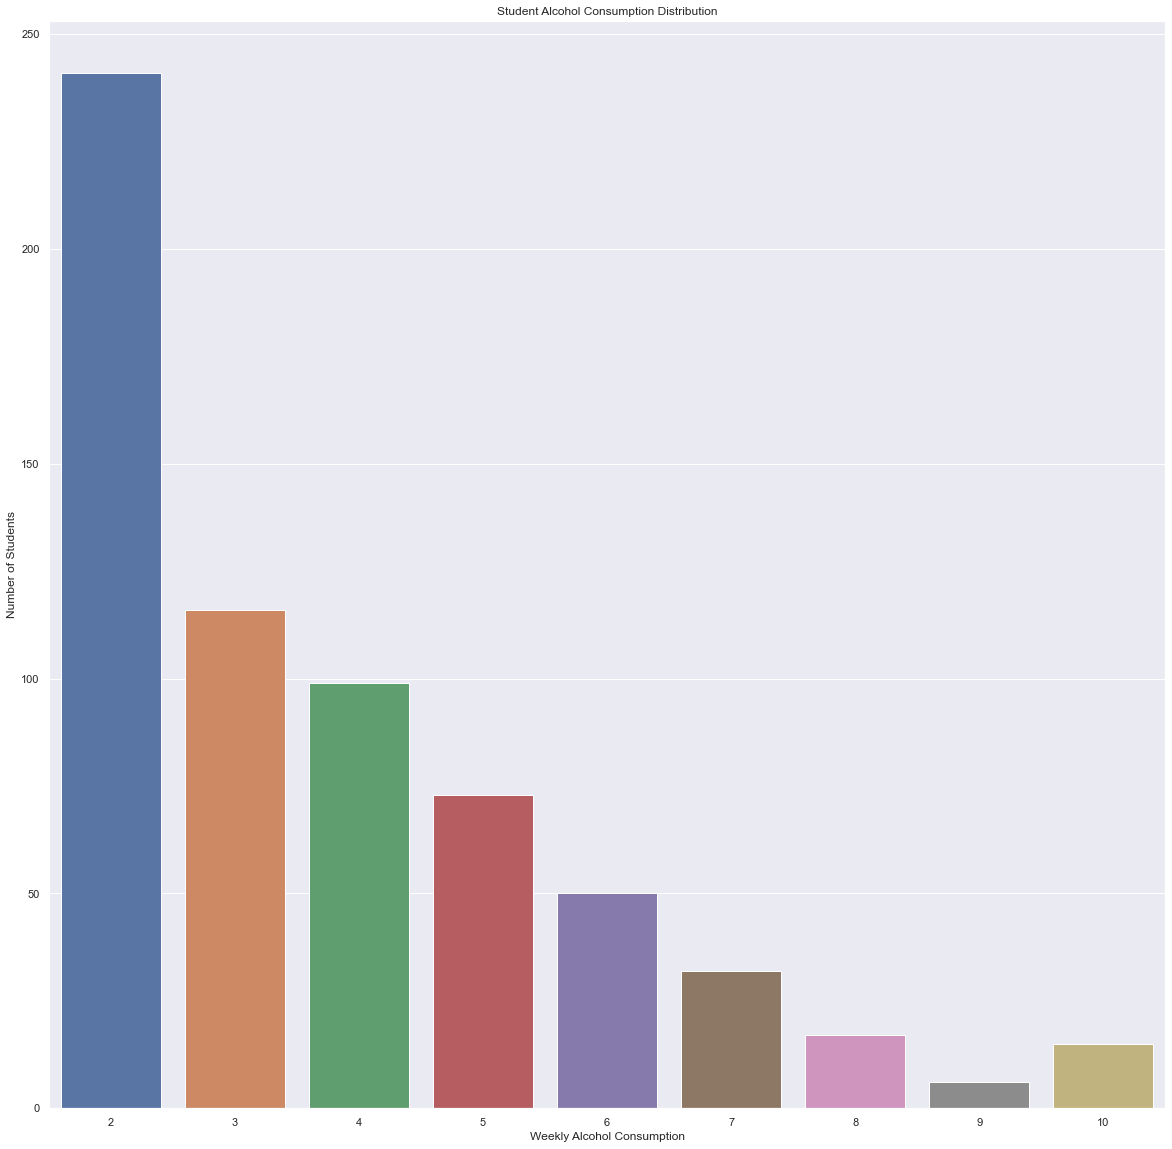

In [605]:
raw_student_data_por['Talc'] = raw_student_data_por['Dalc'] + raw_student_data_por['Walc']

total_alc = raw_student_data_por['Talc']

sns.barplot(x=total_alc.value_counts().keys(), y=total_alc.value_counts().values).set(title='Student Alcohol Consumption Distribution', xlabel='Weekly Alcohol Consumption', ylabel='Number of Students')

[Text(0.5, 1.0, 'Alcohol Consumption'),
 Text(0.5, 0, 'Weekly Alcohol Consumption'),
 Text(0, 0.5, 'Final Grade')]

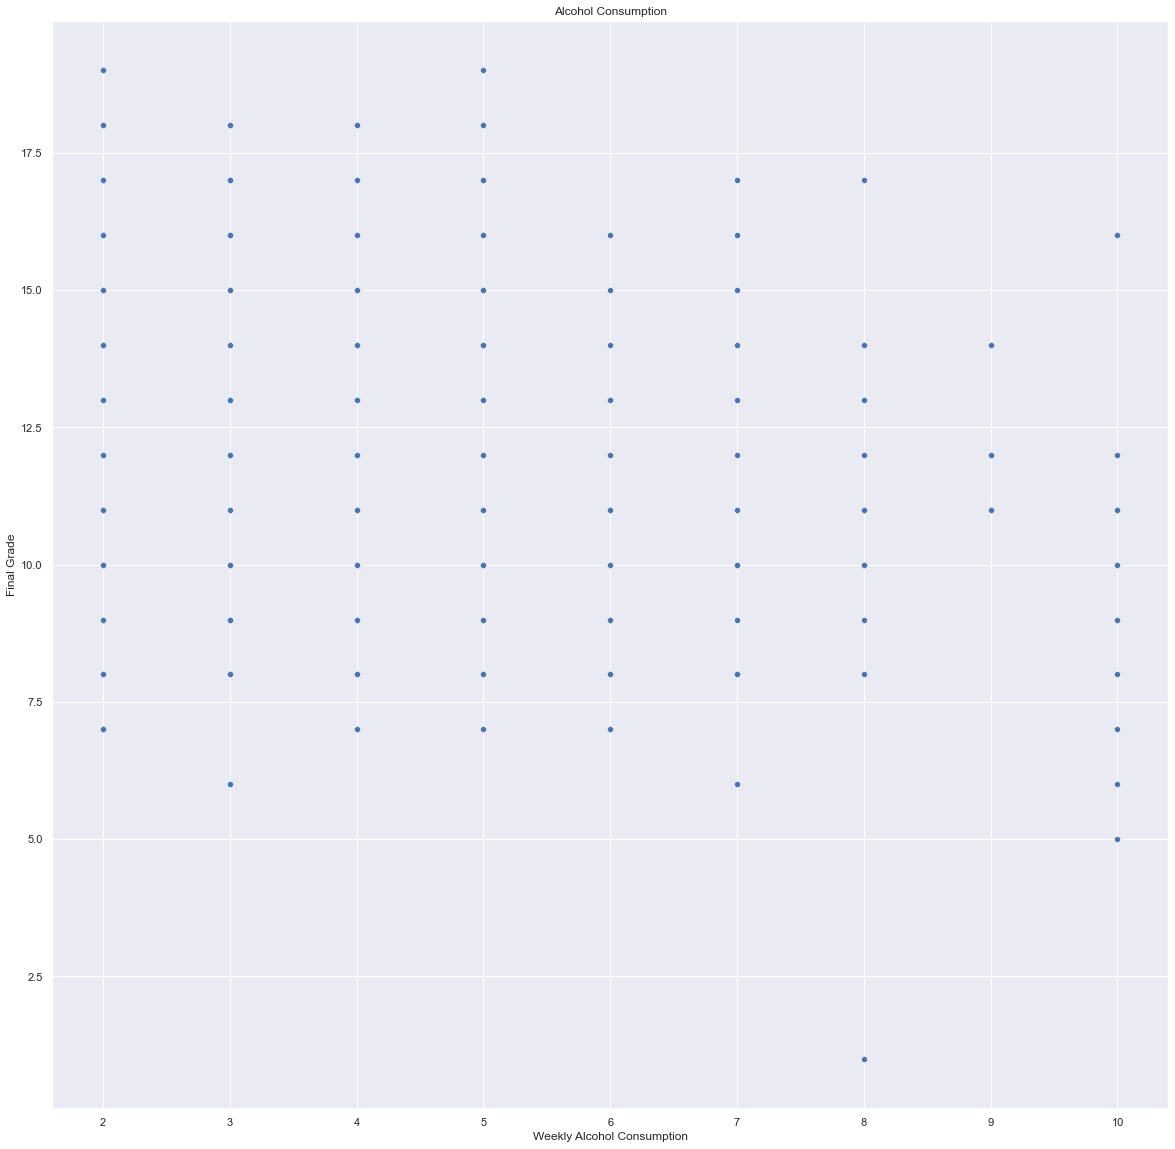

In [606]:
alc_grades = raw_student_data_por[['G3', 'Talc']]
alc_grades = alc_grades.loc[alc_grades['G3'] > 0.0]
alc_grades = alc_grades.sort_values(by='Talc',ascending=True, ignore_index=True)
sns.scatterplot(data=alc_grades, x='Talc', y='G3',).set(title='Alcohol Consumption', xlabel='Weekly Alcohol Consumption', ylabel='Final Grade')

___
#### *What is the relationship between number of absences and final grades?*

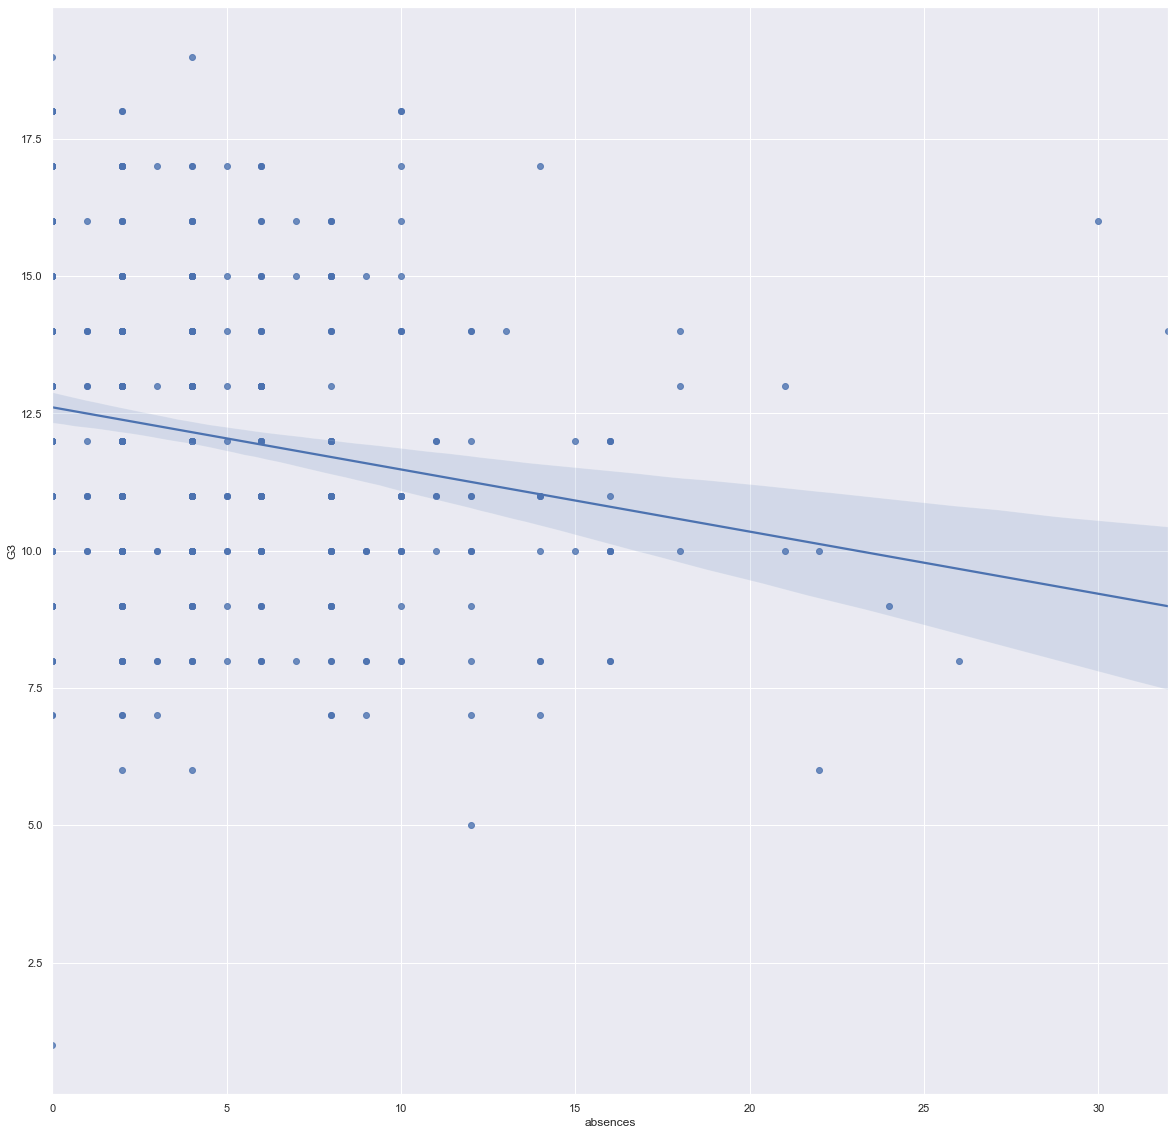

In [609]:
absent_grades = df_por[['absences', 'G3']]
absent_grades = absent_grades.loc[absent_grades['G3'] > 0.0]
# absent_grades.plot(kind='scatter', x='absences', y='G3')
scatterplot = sns.regplot(x=absent_grades['absences'], y=absent_grades['G3'])

It appears that there is a weak negative correlation between the number of days a student is absent and their final grade
___

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'Medu'),
  Text(0, 2.5, 'Fedu'),
  Text(0, 3.5, 'traveltime'),
  Text(0, 4.5, 'studytime'),
  Text(0, 5.5, 'failures'),
  Text(0, 6.5, 'famrel'),
  Text(0, 7.5, 'freetime'),
  Text(0, 8.5, 'goout'),
  Text(0, 9.5, 'Dalc'),
  Text(0, 10.5, 'Walc'),
  Text(0, 11.5, 'health'),
  Text(0, 12.5, 'absences'),
  Text(0, 13.5, 'G1'),
  Text(0, 14.5, 'G2'),
  Text(0, 15.5, 'G3')])

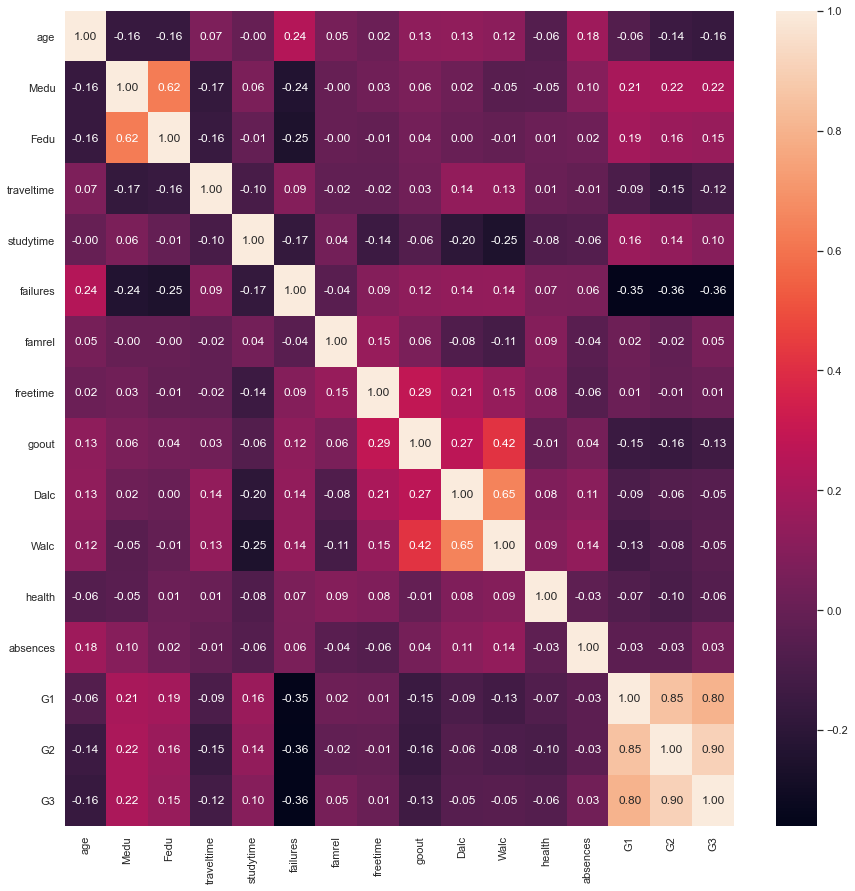

In [608]:
# feature correlation heatmap

plt.figure(figsize=(15, 15))
sns.heatmap(raw_student_data_math.corr(), annot=True, fmt=".2f", cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)